# PEC

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cellpy

In [3]:
# C:\scripts\cellpy\dev_data\PEC
raw_file_path = Path('../../../../Eksempelfiler/Test1058_1.csv')

In [4]:
raw_file_path.is_file()

True

In [5]:
pec = cellpy.get(instrument="pec_csv", filename=raw_file_path, cycle_mode="cathode", mass=50_000)

c:\users\uleri\documents\programming\cellpy\cellpy\readers\cellreader.py:404: UserWarning: Experimental! Not ready for production!
  warnings.warn("Experimental! Not ready for production!")
c:\users\uleri\documents\programming\cellpy\cellpy\readers\instruments\pec.py:171: UserWarning: raw limits have not been subject for testing yet
  warnings.warn("raw limits have not been subject for testing yet")


In [6]:
import holoviews as hv
hv.extension('bokeh')

ModuleNotFoundError: No module named 'holoviews'

In [7]:
pec.get_cycle_numbers()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
steptable = pec.cell.steps
steptable.head(10)

,index,cycle,step,sub_step,point_avr,point_std,point_min,point_max,point_first,point_last,...,ir_std,ir_min,ir_max,ir_first,ir_last,ir_delta,rate_avr,type,sub_type,info
0,0,0,0,1,6.0,3.894440,0,12,0,12,...,0.0,0,0,0,0,0,0.00,rest,None,NaN
1,1,0,2,1,125.0,65.096083,13,237,13,237,...,0.0,0,0,0,0,0,0.05,discharge,None,NaN
2,2,0,3,1,333.0,55.281100,238,428,238,428,...,0.0,0,0,0,0,0,0.00,ocvrlx_up,None,NaN
3,5,1,9,1,992.0,325.481182,429,1555,429,1555,...,0.0,0,0,0,0,0,0.05,charge,None,NaN
4,6,1,11,1,1646.5,52.683014,1556,1737,1556,1737,...,0.0,0,0,0,0,0,0.00,rest,None,NaN
5,3,1,2,1,2218.5,277.849780,1738,2699,1738,2699,...,0.0,0,0,0,0,0,0.05,discharge,None,NaN
6,4,1,3,1,2805.5,61.343296,2700,2911,2700,2911,...,0.0,0,0,0,0,0,0.00,ocvrlx_up,None,NaN
7,9,2,9,1,3460.0,316.820927,2912,4008,2912,4008,...,0.0,0,0,0,0,0,0.05,charge,None,NaN
8,10,2,11,1,4099.5,52.683014,4009,4190,4009,4190,...,0.0,0,0,0,0,0,0.00,rest,None,NaN
9,7,2,2,1,4674.5,279.581831,4191,5158,4191,5158,...,0.0,0,0,0,0,0,0.05,discharge,None,NaN


In [9]:
summary = pec.cell.summary
summary.head(5)

,cycle_index,data_point,test_time,date_time,end_voltage_charge_u_V,end_voltage_discharge_u_V,charge_capacity,discharge_capacity,discharge_capacity_u_mAh_g,charge_capacity_u_mAh_g,...,low_level_u_percentage,high_level_u_percentage,cumulated_ric_u_none,cumulated_ric_sei_u_none,cumulated_ric_disconnect_u_none,shifted_charge_capacity_u_mAh_g,shifted_discharge_capacity_u_mAh_g,normalized_cycle_index,charge_c_rate,discharge_c_rate
0,1,2911,51772.359,2020-06-07 23:03:28,3.800103,2.499998,46.928626,46.287941,925.75882,938.57252,...,NaN,NaN,NaN,NaN,NaN,12.81370,951.38622,0.262244,0.05,0.05
1,2,5365,95881.703,2020-06-08 11:18:38,3.800304,2.499983,46.440053,46.578499,931.56998,928.80106,...,NaN,NaN,0.007564,0.003286,-0.006277,10.04478,938.84584,0.521758,0.05,0.05
2,3,7822,139992.574,2020-06-08 23:33:49,3.800019,2.499988,46.626944,46.410201,928.20402,932.53888,...,NaN,NaN,0.008205,0.004326,-0.002664,14.37964,946.91852,0.782317,0.05,0.05
3,4,9101,162262.205,2020-06-09 05:44:58,3.800261,0.000000,46.443600,0.000000,0.00000,928.87200,...,NaN,NaN,1.012875,0.005046,0.997336,943.25164,1872.12364,1.041851,0.05,NaN


In [10]:
c, v = pec.get_dcap(1)


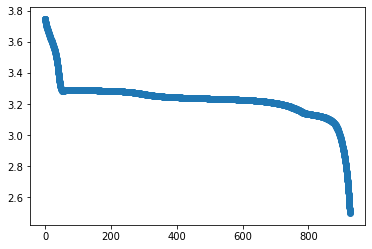

In [11]:
curve1 = plt.scatter(c, v) #hv.Scatter((c,v))
#curve1

In [12]:
from cellpy import log
log.setup_logging(default_level="DEBUG")

In [13]:
from cellpy.utils import ica

In [14]:
dv1, dq1 = ica.dqdv(
    v, c,
)

2020-06-17 15:29 - root - DEBUG (dqdv): dqdv - starting
2020-06-17 15:29 - root - DEBUG (dqdv): dqdv - created Converter obj
2020-06-17 15:29 - root - DEBUG (dqdv): converter.pre_smoothing: True
2020-06-17 15:29 - root - DEBUG (dqdv): converter.post_smoothing: True
2020-06-17 15:29 - root - DEBUG (dqdv): converter.smoothing: False
2020-06-17 15:29 - root - DEBUG (dqdv): converter.normalise: True
2020-06-17 15:29 - root - DEBUG (dqdv): converter.voltage_fwhm: 0.01
2020-06-17 15:29 - root - DEBUG (set_data): setting data (capacity and voltage)
2020-06-17 15:29 - root - DEBUG (inspect_data): inspecting the data
2020-06-17 15:29 - root - DEBUG (pre_process_data): pre-processing the data
2020-06-17 15:29 - root - DEBUG (pre_process_data):  - interpolating voltage(capacity)
2020-06-17 15:29 - root - DEBUG (pre_process_data):  - pre-smoothing (savgol filter window)
2020-06-17 15:29 - root - DEBUG (increment_data): incrementing data
2020-06-17 15:29 - root - DEBUG (increment_data):  - interpol

In [ ]:
converter = ica.Converter()
converter.pre_smoothing = False
converter.post_smoothing = False
converter.smoothing = False
converter.normalise = True
converter.voltage_fwhm = 0.01
converter.max_points = 400
converter.capacity_resolution = 5.0
converter.voltage_resolution = 0.01
converter.set_data(c, v)
converter.inspect_data()
converter.pre_process_data()
converter.increment_data()
converter.post_process_data()

fig = plt.figure(figsize=(800, 500))
curve00 = plt.plot(c, v, label="as is")
curve01 = plt.plot(converter.capacity_preprocessed, converter.voltage_preprocessed, label="preprocessed")
plt.show()

#curve00 = hv.Scatter((c, v), label="as is").opts(width=800, height=500)
#curve01 = hv.Scatter((converter.capacity_preprocessed, converter.voltage_preprocessed), label="preprocessed").opts(width=800, height=500)
#curve00 * curve01

2020-06-17 15:29 - root - DEBUG (set_data): setting data (capacity and voltage)
2020-06-17 15:29 - root - DEBUG (inspect_data): inspecting the data
2020-06-17 15:29 - root - DEBUG (pre_process_data): pre-processing the data
2020-06-17 15:29 - root - DEBUG (pre_process_data):  - interpolating voltage(capacity)
2020-06-17 15:29 - root - DEBUG (increment_data): incrementing data
2020-06-17 15:29 - root - DEBUG (increment_data):  - interpolating capacity(voltage)
2020-06-17 15:29 - root - DEBUG (increment_data):  - diff using DIFF
2020-06-17 15:29 - root - DEBUG (post_process_data): post-processing data
2020-06-17 15:29 - root - DEBUG (post_process_data):  - normalizing


In [ ]:
print(len(converter._voltage_processed))
print(len(converter._incremental_capacity))
fig = plt.figure(figsize=(800, 500))
curve1 = plt.plot(dv1, dq1, label='as is', )
curve2 = plt.plot(converter.voltage_processed, converter.incremental_capacity, label="new")
curve3 = plt.plot(converter._voltage_processed, converter._incremental_capacity, label="pre")
curve4 = plt.plot((converter.voltage_processed, converter._incremental_capacity), label="shifted")
plt.show()

#curve1 = hv.Curve((dv1, dq1), label="as is").opts(width=800, height=500)
#curve2 = hv.Curve((converter.voltage_processed, converter.incremental_capacity), label="new").opts(width=800, height=500)
#curve3 = hv.Curve((converter._voltage_processed, converter._incremental_capacity), label="pre").opts(width=800, height=500)
#curve4 = hv.Curve((converter.voltage_processed, converter._incremental_capacity), label="shifted").opts(width=800, height=500)
#curve1 * curve2 * curve3 * curve4

In [ ]:

dv1, dq1 = ica.dqdv(
    v, c,
    voltage_fwhm=0.01,
)


dv2, dq2 = ica.dqdv(
    v, c,
    voltage_fwhm=0.01,
    max_points=200,
)

fig = plt.figure(figsize=(800, 500))
curve2 = plt.plot(dv1, dq1, label='as is')
scatter2 = plt.plot(dv2, dq2, label='1000 points')
plt.show()

#curve2 = hv.Curve((dv1, dq1), label="as is").opts(width=800, height=500)
#scatter2 = hv.Curve((dv2, dq2), label="1000 points").opts(width=800, height=500)
#curve2 * scatter2

In [ ]:
?ica.dqdv